In [160]:
#import modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
from scipy.optimize import curve_fit

In [161]:
#set current working directory
working_directory = os.getcwd()
print(working_directory)

/Users/ziyaongai/Documents/Crypto/FVT/Data_analytics/Residence_pool


In [162]:
#import csv data
path = working_directory + '/resident_data_Analysis.csv'
df = pd.read_csv(path)
df

,slotId,deposit,burnRate,Adj_deposit,Adj_burnRate,owner,transactionHash,timestamp,gasUsed,gasPrice,ethSpent
0,7,1.000000e+20,5.000000e+12,100.00,0.5,0x26098C24cA52ae70FF173817E2285A7971c22139,b'9\x04mBL\xe9}+AM\xb9&\x11*\xdf\x83\xac\xa4\x...,1621235600,242821,6.000000e+10,0.014569
1,9,7.800000e+19,0.000000e+00,78.00,0.0,0x6e5d43A620fC9456A1F23BE69933a516E177dDec,b'\x12\x99\xcc\xfe\xabLu\xcf\n\xfb\xf4F\xf1\x0...,1621253335,186549,6.000000e+10,0.011193
2,17,1.500000e+20,1.000000e+13,150.00,1.0,0x26098C24cA52ae70FF173817E2285A7971c22139,b'\x87\x15\xc9\x0e\xb3\x89]\xc6\xc7\x0c\xbe\x8...,1621253540,174421,5.900000e+10,0.010291
3,1,1.000000e+20,1.000000e+12,100.00,0.1,0xED6F4Cd9288FB42F9E119F663B810bE25E857D0B,b'v(q\xac\xd1a\xa07Fu\xe0\x92?\xc9\x95{\xad6d~...,1621253737,191509,5.500000e+10,0.010533
4,50,0.000000e+00,0.000000e+00,0.00,0.0,0xbD75540343904343A49E084523596Ed8d9978d7b,b'ht\xc2\xb4<\xbf\xd2\xacc\xe68\x8e{\xc2+\xcc\...,1621270882,120331,8.300000e+10,0.009987
...,...,...,...,...,...,...,...,...,...,...,...
422,11,7.000000e+18,0.000000e+00,7.00,0.0,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,"b""\xab\x0b+\xa7\x1c\xda\x92'9D\xc3\x03E\x10\x0...",1626041438,132449,7.000000e+09,0.000927
423,12,0.000000e+00,0.000000e+00,0.00,0.0,0x0000000000000000000000000000000000000000,"b""iD\xde\xc6\xa2\x96\x89h\xcc\xb0\xe0\xed\xbd\...",1626171079,110339,1.501000e+10,0.001656
424,28,0.000000e+00,0.000000e+00,0.00,0.0,0x0000000000000000000000000000000000000000,b'60\x05\xfe\xa5\x01 J\x10\x18\x9c\xe0\x10\xe5...,1626171150,110339,1.501000e+10,0.001656
425,11,1.710000e+19,1.000000e+10,17.08,0.0,0x203165Bb2109f960e02Fe44d15f446EFEe1Db60D,b'\x86\xd9\x0fr*!\xb1\xbb7\x03\x00yC9!=\xa1\xc...,1626382297,185967,3.600000e+10,0.006695


Text(0, 0.5, 'Burn Rate')

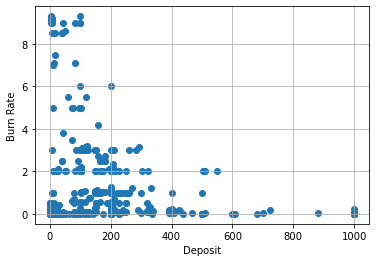

In [163]:
#scatter plot with trendline
data = df[['Adj_deposit', 'Adj_burnRate']]
x = data['Adj_deposit']
y = data['Adj_burnRate']
plt.scatter(x,y)
plt.grid(True)
plt.xlabel('Deposit')
plt.ylabel('Burn Rate')

In [176]:
#there are a lot of noises and outliers in the data (i.e. contract with zero deposit and zero burn rate)
#we need to do some data cleaning

#create an empty data frame object
new_df = pd.DataFrame(df)

#delete rows with zeros for both deposit and burnRate
new_df = df.drop(df[(df.Adj_deposit == 0.00) & (df.Adj_burnRate == 0.00)].index)
pd.set_option('display.max_rows', new_df.shape[0]+1)
print(new_df)

     slotId       deposit      burnRate  Adj_deposit  Adj_burnRate  \
0         7  1.000000e+20  5.000000e+12       100.00          0.50   
1         9  7.800000e+19  0.000000e+00        78.00          0.00   
2        17  1.500000e+20  1.000000e+13       150.00          1.00   
3         1  1.000000e+20  1.000000e+12       100.00          0.10   
5         9  7.900000e+19  1.000000e+08        79.00          0.00   
6        38  3.860000e+19  0.000000e+00        38.59          0.00   
7        49  1.000000e+21  1.000000e+11      1000.00          0.01   
8        48  1.000000e+21  1.000000e+11      1000.00          0.01   
9        47  1.000000e+21  1.000000e+11      1000.00          0.01   
10        2  1.000000e+21  1.000000e+11      1000.00          0.01   
11       46  1.000000e+21  1.000000e+08      1000.00          0.00   
12       40  1.000000e+21  1.000000e+07      1000.00          0.00   
13       41  1.000000e+21  1.000000e+07      1000.00          0.00   
14       42  1.00000

Text(0, 0.5, 'Burn Rate')

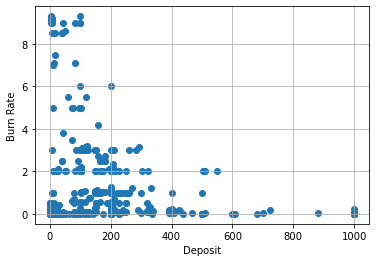

In [165]:
#new scatter plot with trendline
new_data = new_df[['Adj_deposit', 'Adj_burnRate']]
a = new_data['Adj_deposit']
b = new_data['Adj_burnRate']
plt.scatter(a,b)
plt.grid(True)
plt.xlabel('Deposit')
plt.ylabel('Burn Rate')

In [180]:
#in order to performed log-transformed fit on linear axes using equation y=log(x), we need to get rid of all zeros
log_df = pd.DataFrame(new_df)
log_df = new_df.drop(new_df[new_df.Adj_deposit == 0.00].index)
log_df = log_df.drop(new_df[new_df.Adj_burnRate == 0.00].index)
pd.set_option('display.max_rows', log_df.shape[0]+1)
print(log_df)

     slotId       deposit      burnRate  Adj_deposit  Adj_burnRate  \
0         7  1.000000e+20  5.000000e+12       100.00          0.50   
2        17  1.500000e+20  1.000000e+13       150.00          1.00   
3         1  1.000000e+20  1.000000e+12       100.00          0.10   
7        49  1.000000e+21  1.000000e+11      1000.00          0.01   
8        48  1.000000e+21  1.000000e+11      1000.00          0.01   
9        47  1.000000e+21  1.000000e+11      1000.00          0.01   
10        2  1.000000e+21  1.000000e+11      1000.00          0.01   
19       37  1.000000e+21  1.000000e+11      1000.00          0.01   
20       36  1.000000e+21  1.000000e+11      1000.00          0.01   
22       35  1.000000e+21  1.000000e+11      1000.00          0.01   
24       32  7.230000e+20  2.000000e+12       723.23          0.20   
25       29  8.000000e+19  1.000000e+12        80.00          0.10   
27       12  2.500000e+20  5.000000e+12       250.00          0.50   
28       30  7.00000

In [183]:
fig = px.scatter(log_df, x="Adj_deposit", y="Adj_burnRate", 
                 trendline="ols", trendline_options=dict(log_x=True),
                 labels={"Adj_deposit": "Deposit (SLP)", "Adj_burnRate": "Burn Rate"},
                 title="Correlation between Deposit and Burn Rate")
fig.show()

In [129]:
#use Pearson's correlation coefficient to find Pearson's r and p-value
from scipy import stats
stats.pearsonr(new_df['Adj_deposit'], new_df['Adj_burnRate'])

(-0.2679554269843285, 3.9007317033738896e-07)

Pearson's R (-0.27) shows that the deposit and the burn rate are inversely correlated.

In [169]:
#delete deposit and burn rate columns and conduct correlation map analysis
cor_df = new_df.drop(columns=['deposit', 'burnRate'])

In [170]:
cormat = cor_df.corr()
round(cormat,2)

,slotId,Adj_deposit,Adj_burnRate,timestamp,gasUsed,gasPrice,ethSpent
slotId,1.00,0.17,-0.08,-0.08,-0.02,0.02,0.01
Adj_deposit,0.17,1.00,-0.27,-0.30,0.06,0.52,0.53
Adj_burnRate,-0.08,-0.27,1.00,0.49,0.13,-0.34,-0.33
timestamp,-0.08,-0.30,0.49,1.00,-0.01,-0.62,-0.62
gasUsed,-0.02,0.06,0.13,-0.01,1.00,-0.16,-0.02
gasPrice,0.02,0.52,-0.34,-0.62,-0.16,1.00,0.98
ethSpent,0.01,0.53,-0.33,-0.62,-0.02,0.98,1.00


<AxesSubplot:>

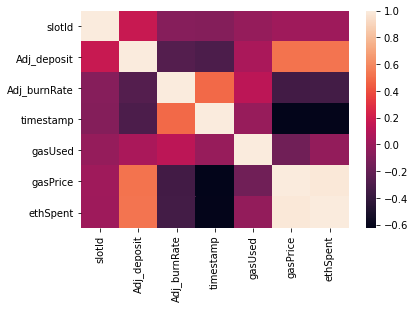

In [171]:
sns.heatmap(cormat)

The use of heatmap is a neat tool to show the correlations between different variables